In [29]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Data Exploration (Germany)

In [ ]:
# Germany
df_germany = pd.read_csv('./data/final_data/germany_final.csv', sep=';')


,Unnamed: 0,avg_lat_ms,tests,devices,quarter,category,long,lat,country,avg_d_mbps,avg_u_mbps
0,0,43,4,2,2019-01-01,fixed,8.415527,55.024873,Germany,8,1
1,1,34,1,1,2019-01-01,fixed,8.421021,55.024873,Germany,33,9
2,2,29,1,1,2019-01-01,fixed,8.426514,55.024873,Germany,24,11
3,3,40,2,1,2019-01-01,fixed,8.432007,55.024873,Germany,35,7
4,4,33,4,3,2019-01-01,fixed,8.421021,55.021725,Germany,7,2


KeyboardInterrupt: 

In [30]:
# Cleaning and adjustments
df_germany.drop(columns=[',', 'geometry', 'iso3', 'continent', 'region', 'iso_3166_1_'], inplace=True)

KeyError: "[',', 'geometry', 'iso3', 'continent', 'region', 'iso_3166_1_'] not found in axis"

In [34]:
# rename country column
df_germany.rename(columns={'name':'country'}, inplace=True)

In [35]:
# Convert to mpbs
df_germany['avg_d_mbps'] = df_germany['avg_d_kbps'] / 1000
df_germany['avg_u_mbps'] = df_germany['avg_u_kbps'] / 1000

# Round mbps and convert to int
df_germany['avg_d_mbps'] = df_germany['avg_d_mbps'].round(0).astype(int)
df_germany['avg_u_mbps'] = df_germany['avg_u_mbps'].round(0).astype(int)

# Drop kbps columns
df_germany.drop(columns=['avg_d_kbps', 'avg_u_kbps'], inplace=True)


KeyError: 'avg_d_kbps'

In [95]:
# Convert columns to int16 to save space
df_germany['avg_d_mbps'] = df_germany['avg_d_mbps'].astype('int16')
df_germany['avg_u_mbps'] = df_germany['avg_u_mbps'].astype('int16')
df_germany['avg_lat_ms'] = df_germany['avg_lat_ms'].astype('int16')
df_germany['tests'] = df_germany['tests'].astype('int16')
df_germany['devices'] = df_germany['devices'].astype('int16')
df_germany['country'] = df_germany['country'].astype('string')
df_germany['category'] = df_germany['category'].astype('category')

In [96]:
df_germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5347564 entries, 0 to 5347563
Data columns (total 10 columns):
 #   Column      Dtype   
---  ------      -----   
 0   avg_lat_ms  int16   
 1   tests       int16   
 2   devices     int16   
 3   quarter     object  
 4   category    category
 5   long        float64 
 6   lat         float64 
 7   country     string  
 8   avg_d_mbps  int16   
 9   avg_u_mbps  int16   
dtypes: category(1), float64(2), int16(5), object(1), string(1)
memory usage: 219.3+ MB


In [97]:
# save as comma separated csv
df_germany.to_csv('./data/final_data/germany_final.csv', sep=',')

#### Numerical Exploration

In [43]:
df_germany = pd.read_csv('../../Documents/Master/Semester1/Visual_Analytics/Data_Input_final/germany_final_2.csv', sep=',')
df_germany.shape

(5347564, 11)

In [38]:
df_germany.head()

,Unnamed: 0,avg_lat_ms,tests,devices,quarter,category,long,lat,country,avg_d_mbps,avg_u_mbps
0,0,43,4,2,2019-01-01,fixed,8.415527,55.024873,Germany,8,1
1,1,34,1,1,2019-01-01,fixed,8.421021,55.024873,Germany,33,9
2,2,29,1,1,2019-01-01,fixed,8.426514,55.024873,Germany,24,11
3,3,40,2,1,2019-01-01,fixed,8.432007,55.024873,Germany,35,7
4,4,33,4,3,2019-01-01,fixed,8.421021,55.021725,Germany,7,2


In [11]:
df_germany.tail()

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,quarter,category,long,lat,geometry,iso3,name,continent,region,iso_3166_1_,avg_d_mbps,avg_u_mbps
5347559,121918,23166,36,2,2,2022-07-01,mobile,13.057251,47.632082,POINT (13.0572509765625 47.6320819402633),DEU,Germany,Europe,Western Europe,DE,121.918,23.166
5347560,47607,3937,26,1,1,2022-07-01,mobile,13.062744,47.632082,POINT (13.062744140625 47.6320819402633),DEU,Germany,Europe,Western Europe,DE,47.607,3.937
5347561,74673,8763,50,1,1,2022-07-01,mobile,13.090210,47.628380,POINT (13.0902099609375 47.6283800274471),DEU,Germany,Europe,Western Europe,DE,74.673,8.763
5347562,339,44,113,1,1,2022-07-01,mobile,13.018799,47.602459,POINT (13.018798828125 47.6024592954631),DEU,Germany,Europe,Western Europe,DE,0.339,0.044
5347563,20851,1318,62,1,1,2022-07-01,mobile,13.013306,47.598755,POINT (13.0133056640625 47.598755284818),DEU,Germany,Europe,Western Europe,DE,20.851,1.318


In [6]:
df_germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5347564 entries, 0 to 5347563
Data columns (total 17 columns):
 #   Column       Dtype  
---  ------       -----  
 0   avg_d_kbps   int64  
 1   avg_u_kbps   int64  
 2   avg_lat_ms   int64  
 3   tests        int64  
 4   devices      int64  
 5   quarter      object 
 6   category     object 
 7   long         float64
 8   lat          float64
 9   geometry     object 
 10  iso3         object 
 11  name         object 
 12  continent    object 
 13  region       object 
 14  iso_3166_1_  object 
 15  avg_d_mbps   float64
 16  avg_u_mbps   float64
dtypes: float64(4), int64(5), object(8)
memory usage: 693.6+ MB


In [36]:
df_germany.describe()

,Unnamed: 0,avg_lat_ms,tests,devices,long,lat,avg_d_mbps,avg_u_mbps
count,5.347564e+06,5.347564e+06,5.347564e+06,5.347564e+06,5.347564e+06,5.347564e+06,5.347564e+06,5.347564e+06
mean,2.673782e+06,2.614932e+01,9.455708e+00,2.921295e+00,9.693960e+00,5.091353e+01,6.339939e+01,1.869401e+01
std,1.543709e+06,4.398488e+01,2.178635e+01,4.111197e+00,2.105081e+00,1.753226e+00,6.810599e+01,2.373100e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.866699e+00,4.729041e+01,0.000000e+00,0.000000e+00
25%,1.336891e+06,1.400000e+01,1.000000e+00,1.000000e+00,8.003540e+00,4.946098e+01,2.000000e+01,6.000000e+00
50%,2.673782e+06,2.100000e+01,3.000000e+00,2.000000e+00,9.420776e+00,5.103794e+01,4.400000e+01,1.200000e+01
75%,4.010672e+06,3.000000e+01,9.000000e+00,3.000000e+00,1.129395e+01,5.224126e+01,8.300000e+01,2.400000e+01
max,5.347563e+06,3.187100e+04,3.987000e+03,5.170000e+02,1.502930e+01,5.505006e+01,1.616000e+03,9.120000e+02


#### Visual Exploration

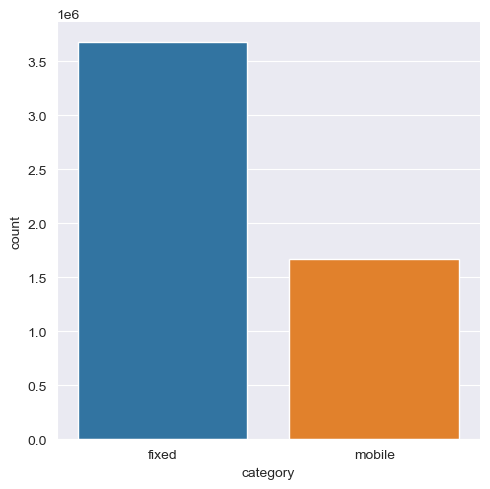

In [39]:
# Plot count broadband types fixed and mobile
plt = sns.catplot(data=df_germany,
			x="category",
			kind="count"
		    )

plt

AttributeError: 'FacetGrid' object has no attribute 'show'

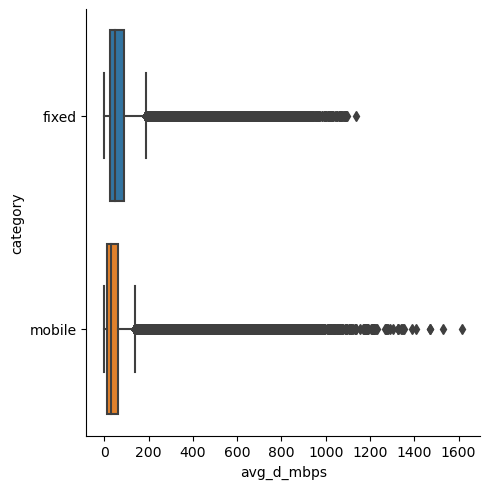

In [46]:
# Boxplots
sns.catplot(data=df_germany,
            x="avg_d_mbps", y="category",
            kind="box"
            )

plt.show()

### Data Exploration (Whole World)

In [59]:
# df_world = pd.read_csv('./data/final_data/world_aggregated_final.csv', sep=';')
df_world = pd.read_csv('../../Documents/Master/Semester1/Visual_Analytics/Data_Input_final/world_aggregated_final.csv', sep=';')

#### Numerical

In [60]:
df_world.head(10)

,country,quarter,category,devices,tests,row_count,avg_lat_ms,avg_d_mbps,avg_u_mbps
0,Afghanistan,2019-01-01,fixed,2884,13839,819,79,5,5
1,Albania,2019-01-01,fixed,23259,73138,6259,27,15,7
2,Algeria,2019-01-01,fixed,9787,42838,4774,80,4,2
3,American Samoa,2019-01-01,fixed,161,618,72,120,16,6
4,Andorra,2019-01-01,fixed,2132,4574,235,12,67,62
5,Angola,2019-01-01,fixed,2447,8300,658,37,11,4
6,Anguilla,2019-01-01,fixed,552,1847,148,41,17,7
7,Antigua & Barbuda,2019-01-01,fixed,1557,5761,353,64,11,5
8,Argentina,2019-01-01,fixed,106387,337385,25896,33,26,5
9,Armenia,2019-01-01,fixed,21983,70255,4026,14,21,18


In [61]:
df_world.shape

(6995, 9)

In [44]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6995 entries, 0 to 6994
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     6995 non-null   object
 1   quarter     6995 non-null   object
 2   category    6995 non-null   object
 3   devices     6995 non-null   int64 
 4   tests       6995 non-null   int64 
 5   avg_lat_ms  6995 non-null   int64 
 6   avg_d_mbps  6995 non-null   int64 
 7   avg_u_mbps  6995 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 437.3+ KB


In [46]:
df_world.describe()

,devices,tests,row_count,avg_lat_ms,avg_d_mbps,avg_u_mbps
count,6.995000e+03,6.995000e+03,6.995000e+03,6995.000000,6995.000000,6995.000000
mean,1.031419e+05,3.448508e+05,2.168110e+04,57.154682,42.117941,19.850751
std,4.124471e+05,1.495993e+06,9.145172e+04,105.572755,41.304213,25.979079
min,1.000000e+00,1.000000e+00,1.000000e+00,3.000000,0.000000,0.000000
25%,3.685000e+02,9.295000e+02,1.590000e+02,21.000000,15.000000,8.000000
50%,3.480000e+03,9.831000e+03,1.025000e+03,31.000000,28.000000,12.000000
75%,4.426600e+04,1.092515e+05,1.035050e+04,48.000000,53.000000,19.000000
max,7.892389e+06,3.220960e+07,1.706847e+06,1896.000000,376.000000,211.000000


#### Visual

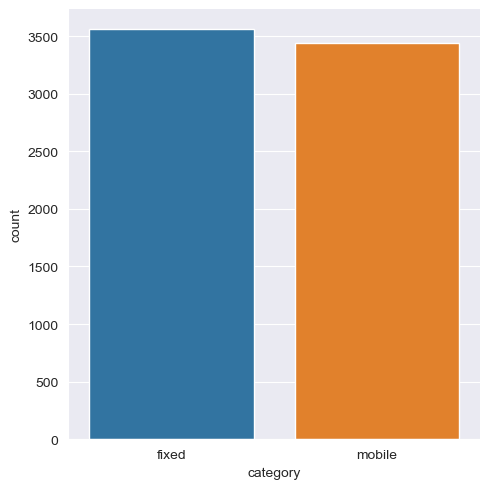

In [62]:
# Plot count tests per country
plt = sns.catplot(data=df_world,
			x="category",
			kind="count"
		    )

plt

In [48]:
# countries with highest avg download speeds in some quarter
df_top_10_d = df_world.sort_values(by=['avg_d_mbps'], ascending=False)[(df_world['quarter'] == '2022-07-01') & (df_world['tests'] > 10000)].iloc[:10]

C:\Users\julia\AppData\Local\Temp\ipykernel_20536\1431113144.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top_10_d = df_world.sort_values(by=['avg_d_mbps'], ascending=False)[(df_world['quarter'] == '2022-07-01') & (df_world['tests'] > 10000)].iloc[:10]


In [49]:
df_top_10_d

,country,quarter,category,devices,tests,row_count,avg_lat_ms,avg_d_mbps,avg_u_mbps
6934,Republic of Korea,2022-07-01,mobile,17258,34154,9840,34,259,28
3362,Chile,2022-07-01,fixed,249469,775648,22052,11,255,184
3512,Singapore,2022-07-01,fixed,83530,321013,982,5,244,211
3417,Hong Kong,2022-07-01,fixed,102499,404698,1324,6,240,196
3363,China,2022-07-01,fixed,1356979,4921189,461226,14,234,55
6981,United Arab Emirates,2022-07-01,mobile,18244,49308,5307,35,226,29
3530,Thailand,2022-07-01,fixed,676030,2164643,117756,7,215,179
3546,United States of America,2022-07-01,fixed,5818788,19823785,1601486,22,214,69
6791,Bulgaria,2022-07-01,mobile,37855,66492,11008,30,211,26
6776,Bahrain,2022-07-01,mobile,9992,17820,831,20,204,25


In [63]:
# aggregate the df_world once more (weighted average on number of rows)
# reasons: 1) check which countries to remove (see below)
#          2) later, we will this compare weighted average calculation to simple mean
#          3) based on our analysis in 2), we will come to the conclusion that this fully aggregated version of the dataset has to be the one we load into PowerBI

# this logic uses the same workaround for the weighted average as in combined_preprocessed_files
def weighted_average_calculation(df_world):
	df_world['product1'] = df_world['avg_d_mbps'] * df_world['row_count']
	df_world['product2'] = df_world['avg_u_mbps'] * df_world['row_count']
	df_world['product3'] = df_world['avg_lat_ms'] * df_world['row_count']

	df_world_agg = df_world.groupby('country', as_index=False).agg({'product1': sum,
																	'product2': sum,
																	'product3': sum,
																	'row_count': sum,
																	'devices': sum,
																	'tests': sum})

	df_world_agg['avg_d_mbps'] = df_world_agg['product1'] / df_world_agg['row_count']
	df_world_agg['avg_u_mbps'] = df_world_agg['product2'] / df_world_agg['row_count']
	df_world_agg['avg_lat_ms'] = df_world_agg['product3'] / df_world_agg['row_count']

	df_world_agg = df_world_agg.drop(columns=['product1', 'product2', 'product3'])

	df_world_agg = df_world_agg.sort_values('avg_d_mbps')
	return df_world_agg

In [64]:
df_world_agg = weighted_average_calculation(df_world)

In [65]:
# there are small territories (which are not even countries) that falsify the result. They should not be in the country ranking and most of them even have so little amount of tests that we can consider them insignificant. Thus, we drop them from both dataframes.
territory_drop_list = ['South Georgia & the South Sandwich Islands',
					   'Reunion',
					   'Jersey',
					   'Macao',
					   'Azores Islands',
					   'Kuril Islands',
					   'Madeira Islands',
					   'Gibraltar',
					   'Bermuda',
					   'Holy See',
					   'French Guiana',
					   'Aruba',
					   'Puerto Rico',
					   'Guadeloupe',
					   'Svalbard and Jan Mayen Islands',
					   'Martinique',
					   'Aksai Chin',
					   'West Bank',
					   'Faroe Islands',
					   'Isle of Man',
					   'Cayman Islands',
					   'British Virgin Islands',
					   'Netherlands Artilles',
					   'New Caledonia',
					   'Guam',
					   'Northern Mariana Islands',
					   'Jammu-Kashmir',
					   'Montserrat',
					   'Guernsey',
					   'United States Virgin Islands',
					   'Midway Is.',
					   'Heard Island and McDonald Islands',
					   'Greenland',
					   'American Samoa',
					   'Arunachal Pradesh',
					   'Anguilla',
					   'Guantanamo',
					   'Norfolk Island',
					   'French Polynesia',
					   'Turks and Caicos Islands',
					   'Gaza Strip',
					   'Mayotte',
					   'French Southern and Antarctic Territories',
					   'Cocos (Keeling) Islands',
					   'Christmas Island',
					   'Niue',
					   "Hala'ib Triangle",
					   'British Indian Ocean Territory',
					   'Falkland Islands (Malvinas)',
					   'Abyei']
df_world_agg = df_world_agg[df_world_agg['country'].isin(territory_drop_list) == False]

In [66]:
# comparison of weighted average with standard mean:

# As a reminder: weighted average is computationally correct, the mean would be easy to implement in PowerBI
# Purpose of this comparison is to find out how far they are apart, to check if it makes sense to implement the mean as a proxy for the weighted average

# 1) calculate aggregation with mean
world_grouped = df_world.groupby('country',
								 as_index=False).agg({'avg_d_mbps': np.average,
												 	  'avg_u_mbps': np.average,
													  'avg_lat_ms': np.average,
													  'devices': sum,
													  'tests': sum})

# 2) merge mean results with weighted average results
merged = df_world_agg.merge(world_grouped, on='country', how='left')

# 3) create comparison columns
merged['diff_download'] = abs((merged['avg_d_mbps_x'] - merged['avg_d_mbps_y']) / merged['avg_d_mbps_x'])
merged['diff_upload'] = abs((merged['avg_u_mbps_x'] - merged['avg_u_mbps_y']) / merged['avg_u_mbps_x'])
merged['diff_latency'] = abs((merged['avg_lat_ms_x'] - merged['avg_lat_ms_y']) / merged['avg_lat_ms_x'])
print()
# when you look at the difference measures for the most important countries (the ones at the beginning of the list, you can see that the differences are very high
# thus, mean is no good proxy for weighted average
# we tried to implement the weighted average as aggregation measure in PowerBI, but did not manage to do so (we are not sure if it is even possible). Thus, we decided to load the fully aggregated version of the world dataset into PowerBI (which was already correctly aggregated in Python). This means that unfortunately, no filtering of the "International Comparison" table and the "Germany World Rank" are possible. However, our approach ensures that the presented figures are correct. Moreover, if you wanted to, you can load in different data from Python to analyze the world ranking for a specific category or time period.

In [70]:
# last transformations for world dataset before reading it into PowerBI:

# drop territories that aren't countries
df_world= df_world[df_world['country'].isin(territory_drop_list) == False]

# filter for last 4 quarters
df_world['quarter'] = pd.to_datetime(df_world['quarter']).dt.date
# df_world_final = df_world[df_world['quarter'] >= dt.date(2021, 9, 30)]


# redo weighted average calculation
df_world_final = weighted_average_calculation(df_world.copy())

# drop unnecessary countries that have too little datapoints for 2022 / are too small for comparison to Germany
df_world_final = df_world_final[df_world_final['row_count'] >= 10000]

# add ranking columns to df_world_agg (necessary for world rankings)
df_world_final['rank_download'] = df_world_final['avg_d_mbps'].rank(ascending=False)
df_world_final['rank_upload'] = df_world_final['avg_u_mbps'].rank(ascending=False)
df_world_final['rank_latency'] = df_world_final['avg_lat_ms'].rank(ascending=True)

C:\Program Files\JetBrains\PyCharm 2022.3\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_utils.py:608: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  s = s[:max_items]
C:\Program Files\JetBrains\PyCharm 2022.3\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_utils.py:609: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in s.iteritems():
C:\Program Files\JetBrains\PyCharm 2022.3\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_utils.py:608: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, u

In [41]:
df_world_final

,country,devices,tests,avg_d_mbps,avg_u_mbps,avg_lat_ms,rank_download,rank_upload,rank_latency
180,Turkmenistan,21883,82824,2.820774,3.145775,55.448750,196.0,194.0,171.0
56,Eritrea,82,338,4.707317,1.207317,625.829268,195.0,196.0,196.0
0,Afghanistan,11655,45048,5.993393,4.333591,56.142342,194.0,192.0,172.0
32,Central African Republic,194,603,6.092784,2.020619,458.237113,193.0,195.0,195.0
107,Marshall Islands,19,56,6.789474,6.894737,74.263158,192.0,181.0,178.0
...,...,...,...,...,...,...,...,...,...
113,Monaco,4731,13019,195.193828,137.884380,18.682731,5.0,4.0,67.0
140,Republic of Korea,269371,787714,199.433410,125.742092,13.479666,4.0,5.0,27.0
75,Hong Kong,565971,2134566,204.111313,151.686436,9.206640,3.0,2.0,6.0
35,China,7541521,27863130,210.020174,49.017057,16.146983,2.0,40.0,48.0


In [42]:
df_world_final.to_excel('../../Documents/Master/Semester1/Visual_Analytics/Data_Input_final/world_aggregated_final.xlsx', sheet_name='world_aggregated_final')